# Introduction to Portfolio Theory: Benchmark #

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import skew, kurtosis
from scipy.stats import chi2
from scipy.stats import jarque_bera
from scipy.stats import probplot
from scipy.stats import norm

# Visualization
import matplotlib.pyplot as plt

# Import Data
import yfinance as yf

# Pretty Notation
from IPython.display import display, Math

In [8]:
data = yf.download('^GSPC', start='2000-01-01', end='2025-01-01', interval='1d')
data.dropna(inplace=True)

data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000
...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000


In [10]:
# Calculate the Returns

data['Returns'] = data['Close'].pct_change(1).mul(100)
data = data.loc["2010-01-01":]
data.dropna(inplace=True)

data

C:\Users\edgar\AppData\Local\Temp\ipykernel_15480\727253811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Price,Close,High,Low,Open,Volume,Returns
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,1.604342
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,0.311568
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,0.054552
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,0.400120
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,0.288173
...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,1.104276
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,-0.040566


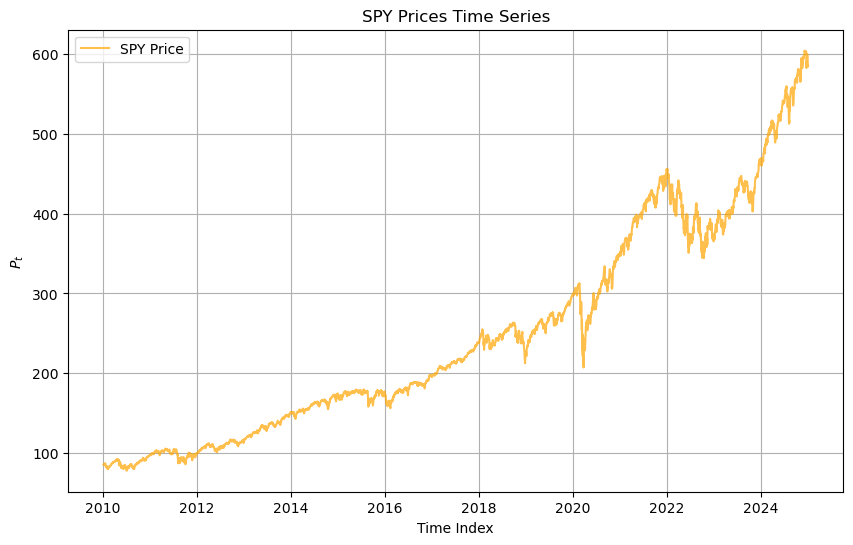

In [124]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='S&P500 Price', color='orange', alpha=0.7)

# Config
plt.title('SPY Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [126]:
data.mean()

Price    Ticker
Close    SPY       2.479519e+02
High     SPY       2.492401e+02
Low      SPY       2.464651e+02
Open     SPY       2.479120e+02
Volume   SPY       1.118051e+08
Returns            5.709291e-02
dtype: float64

In [128]:
data.std()

Price    Ticker
Close    SPY       1.326589e+02
High     SPY       1.333361e+02
Low      SPY       1.318883e+02
Open     SPY       1.326506e+02
Volume   SPY       6.908700e+07
Returns            1.074296e+00
dtype: float64

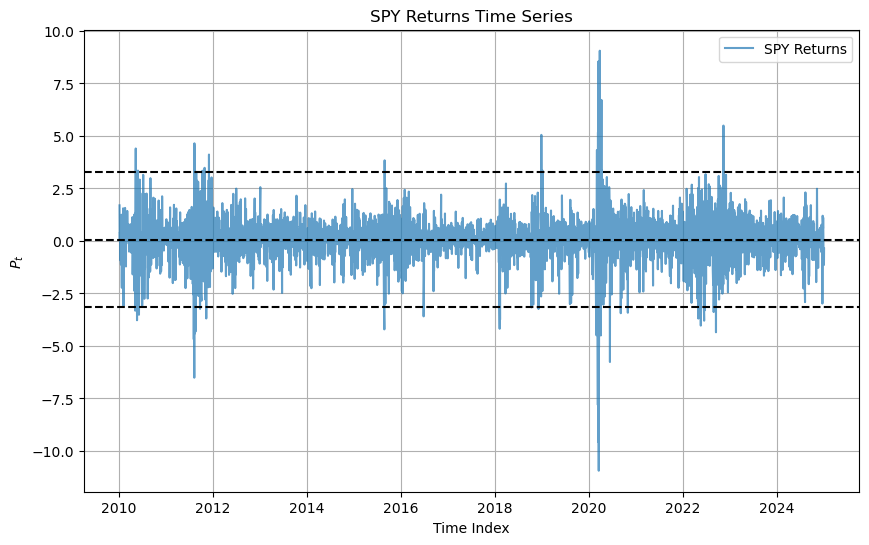

In [148]:
# Time Series Graphs

upper_lim = data['Returns'].mean() + 3*data['Returns'].std()
lower_lim = data['Returns'].mean() - 3*data['Returns'].std()

plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], label='SPY Returns', alpha=0.7)
plt.axhline(y=data['Returns'].mean(), color='black', linestyle='dashed')
plt.axhline(y=upper_lim, color='black', linestyle='dashed')
plt.axhline(y=lower_lim, color='black', linestyle='dashed')

# Config
plt.title('SPY Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

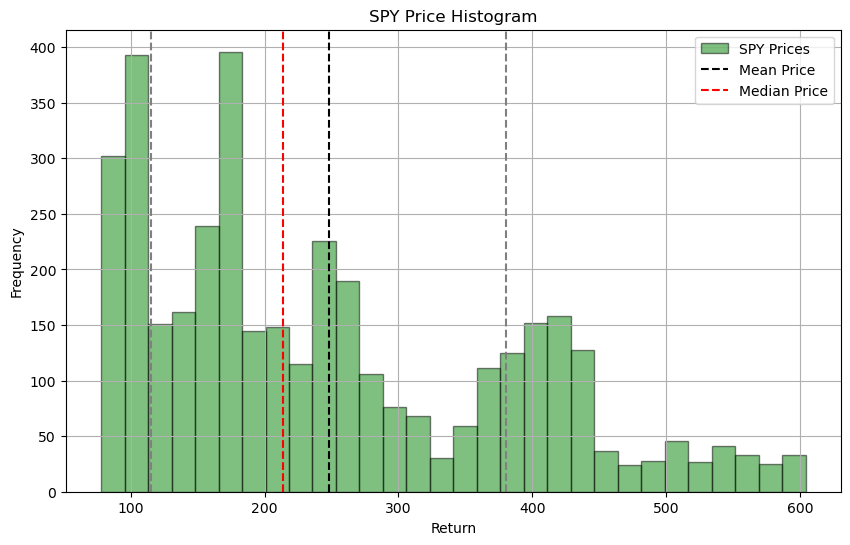

In [132]:
# Create a Histogram of Prices

mean_p = data['Close'].mean().item()
median_p = data['Close'].median().item()
upper_lim_p = (data['Close'].mean() + data['Close'].std()).item()
lower_lim_p = (data['Close'].mean() - data['Close'].std()).item()

plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='green', alpha=0.5, edgecolor='black', label='SPY Prices')

# Mean and Standard Deviation
plt.axvline(x=mean_p, color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=median_p, color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_p, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_p, color='grey', linestyle='dashed')

# Config
plt.title('SPY Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

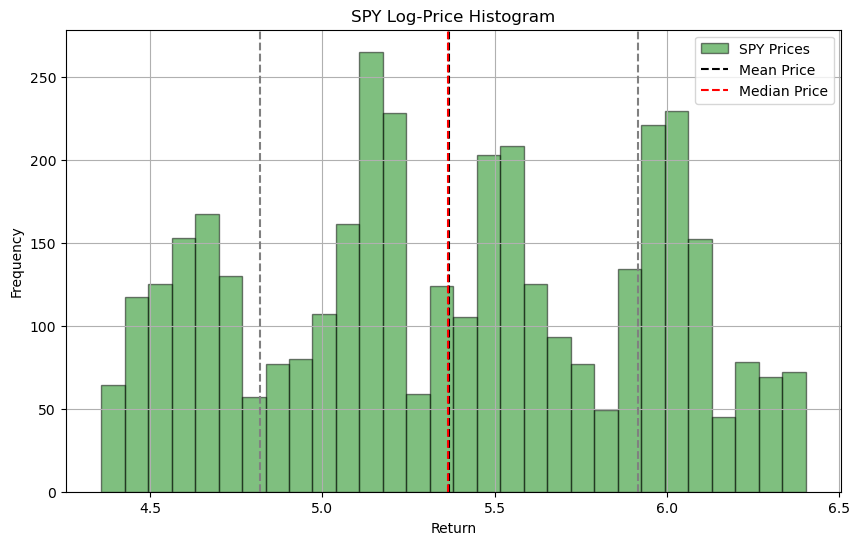

In [134]:
# Create a Histogram of Log Prices

mean_lp = np.log(data['Close']).mean().item()
median_lp = np.log(data['Close']).median().item()
upper_lim_lp = (np.log(data['Close']).mean() + np.log(data['Close']).std()).item()
lower_lim_lp = (np.log(data['Close']).mean() - np.log(data['Close']).std()).item()

plt.figure(figsize=(10, 6))
plt.hist(np.log(data['Close']), bins=30, color='green', alpha=0.5, edgecolor='black', label='SPY Prices')

# Mean and Standard Deviation
plt.axvline(x=mean_lp, color='black', linestyle='dashed', label='Mean Price')
plt.axvline(x=median_lp, color='red', linestyle='dashed', label='Median Price')
plt.axvline(x=upper_lim_lp, color='grey', linestyle='dashed')
plt.axvline(x=lower_lim_lp, color='grey', linestyle='dashed')

# Config
plt.title('SPY Log-Price Histogram')
plt.xlabel('Return')
plt.ylabel('Frequency')

# Legend and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

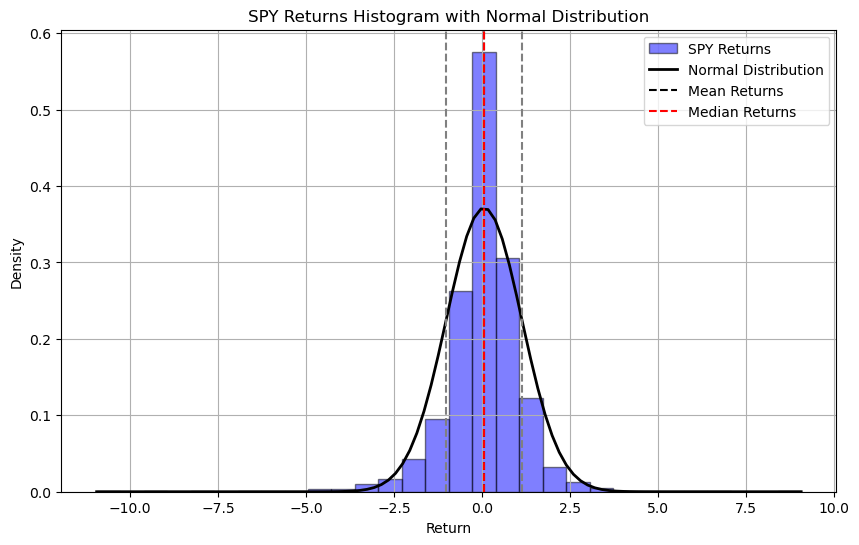

In [136]:
# Calculate Mean and Standard Deviation
mu = data['Returns'].mean()
sigma = data['Returns'].std()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'], bins=30, density=True, color='blue', alpha=0.5, edgecolor='black', label='SPY Returns')

# Generate the Values of the Normal Distribution
x = np.linspace(data['Returns'].min(), data['Returns'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=data['Returns'].median(), color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('SPY Returns Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [138]:
# Let us count how much observations we find inside one std
stds = 1

upper_lim = data['Returns'].mean() + stds*data['Returns'].std()
lower_lim = data['Returns'].mean() - stds*data['Returns'].std()

inside_one_std = data[(data['Returns'] >= lower_lim) & (data['Returns'] <= upper_lim)]

percentage = (len(inside_one_std)/len(data))*100

print(percentage)

78.66984631690515


In [140]:
# Calculate Skewness
skewness = skew(data['Returns'].dropna())

# Calculate Kurtosis
kurt = kurtosis(data['Returns'].dropna())

print(f"Mean: {data['Returns'].dropna().mean()}")
print(f"Variance: {data['Returns'].dropna().var()}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 0.05709291198501631
Variance: 1.1541123909933986
Skewness: -0.5146719895173144
Kurtosis: 10.761866098196835


In [142]:
# Normality Test

jb_stat, p_value = jarque_bera(data['Returns'].dropna())

print(f"Jarque-Bera Stat: {jb_stat}")
print(f"p-value: {p_value}")

Jarque-Bera Stat: 18378.957145738506
p-value: 0.0


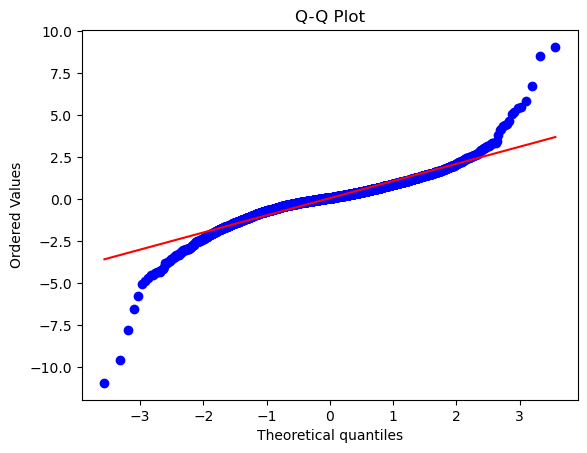

In [144]:
# Prices QQ Plot

probplot(data['Returns'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()